The goal of this notebook is to explore possible feature engineering options to acquire more data. Explore the information in all the publications. 
Option 1: Add hospital ID as a feature

In [109]:
#All imports
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import statsmodels.api as sm



In [110]:
#Load healthgrades data
df_doc = pd.read_pickle('HealthgradesNymagClean.pkl')
#Load publications dictionary for each name
pub_dict = pickle.load(open( "pubmeddict.pkl", "rb" ))
#Load publications dataframe
df_pub = pd.read_pickle('ArticleDetails.pkl')
df_pub = df_pub.rename(index=str, columns={"Citation Number": "CitationNumber"})



In [111]:
#Visualize data to see if it makes sense
df_doc.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,specialistDesc,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,isbest,Number_pub
fullname,,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",96.0,10.0,10.0,36.0,23.0,False,36
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",96.0,10.0,10.0,16.0,55.0,False,90
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",88.0,9.0,9.0,14.0,19.0,False,1
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,"[Oncology Specialist, Hematology Specialist, I...",70.0,7.0,7.0,10.0,32.0,True,39
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",100.0,10.0,10.0,8.0,36.0,False,1


In [112]:
#check for 500 publications (this was limit in search term
for doctor in df_doc.index:
    if df_doc.loc[doctor,'Number_pub'] == 500: print(df_doc.loc[doctor])


aboutMe                       Praddep Chandra, MB is a Hematology Specialist...
address.line1                                                 1545 Atlantic Ave
address.line2                                                Brooklyn, NY 11213
affiliatedHospitalIDs                                                       NaN
age                                                                          68
gender                                                                        M
isRecommendedProvider                                                     False
payorCount                                                                    0
premiumDisplayOasLabel                                                     call
providerSponsorships                                                        NaN
specialistDesc                [Hematology Specialist, Oncology Specialist, I...
surveyOverallRatingPercent                                                  NaN
surveyOverallRatingScore                

In [113]:
#an anomaly, delete
df_doc = df_doc.drop('Praddep Chandra',axis = 0)

In [114]:
#Create feature vectors for hospital IDs
#First see number of unique hospital IDS
Hosp_IDlist = []
for IDlist in df_doc.affiliatedHospitalIDs: 
    if type(IDlist) is list :
        for ID in IDlist:
            if not ID in Hosp_IDlist: Hosp_IDlist.append(ID)
            


In [115]:
#check total number of hospital IDs
len(Hosp_IDlist)

45

In [116]:
#create a function that takes two inputs, doctor and hospital ID
# and returns true or false if that doctor is affilliated with the hospital
def affiliated(doctorname,Hosp_ID):
    if type(df_doc.loc[doctorname,'affiliatedHospitalIDs']) is list:
        if Hosp_ID in df_doc.loc[doctorname,'affiliatedHospitalIDs']:
            return 1.0
        else: return 0.0
    else: return 0.0

In [117]:
#test the function
affiliated('Jeffrey Tepler','HGST7FF97B36330214')

0.0

In [118]:
#test the function
affiliated('Jeffrey Tepler','HGST750A7B36330101')

1.0

In [119]:
#apply to all doctors for any hospital ID
for ID in Hosp_IDlist:
    df_doc[ID] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: affiliated(x,ID))

In [120]:
df_doc.HGST750A7B36330101.sum()

53.0

In [121]:
df_doc.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,...,HGST87380596310038,HGST4D8B6BC6520177,HGSTF9797B36340061,HGSTD00A7B36330185,HGSTD2238D46100271,HGST460B7B36030103,HGSTA5380596310008,HGSTC6380596310025,HGST600A7B36330231,HGST11346F56140088
fullname,,,,,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
df_pub.head()

,ArticleTitle,JournalTitle,JournalYear,Abstract,CitationNumber
10374832,"Evaluation of butylated hydroxyanisole, myo-in...",Cancer letters,1999,The potential activities of butylated hydroxya...,122.0
10426810,Tumorigenicity and metabolism of 4-(methylnitr...,Carcinogenesis,1999,4-(Methylnitrosamino)-1-(3-pyridyl)-1-butanol ...,75.0
10435157,The effect of granulocyte colony-stimulating f...,Oral oncology,1999,We investigated the effect of granulocyte colo...,31.0
10543400,Evaluation of the protein truncation test and ...,Human genetics,1999,The neurofibromatosis type 1 (NF1) gene locate...,27.0
10593996,Unusual clustering of brain tumours in a famil...,Journal of medical genetics,1999,Neurofibromatosis type 1 (NF1) is one of the c...,5.0


In [123]:
#Write a function to calculate i-10 index for a given doctor, 
#which is the number of publications an author gets >10 citations on
#inputs are doctor name and list of publications
def i10_score(doctorname):
    #make a list of Ids in the dataframe
    uid_list = []
    for uid in pub_dict[doctorname]:
        if uid in df_pub.index: uid_list.append(uid)
    citations_series = df_pub.loc[uid_list,'CitationNumber']
    return np.sum((citations_series>5.0))
    

In [124]:
#test the above function
i10_score('Sylvia Adams')

30

In [125]:
#create a column with i10-score
df_doc['i10_score'] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: i10_score(x))    

In [126]:
#create a column with TOTAL number of citations
def totalcit(doctorname):
    #make a list of Ids in the dataframe
    uid_list = []
    for uid in pub_dict[doctorname]:
        if uid in df_pub.index: uid_list.append(uid)
    citations = df_pub.loc[uid_list,'CitationNumber'].sum()
    return citations

In [127]:
#test the above funciton
totalcit('Sylvia Adams')

2195.0

In [128]:
df_doc['totalcit'] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: totalcit(x))    

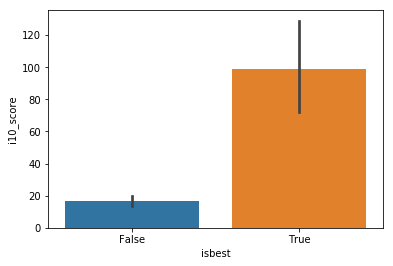

In [129]:
#check if trends exist for i10_score and totalcit
sns.barplot(x = df_doc.isbest, y = df_doc.i10_score)

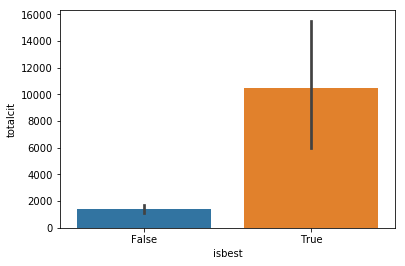

In [130]:
sns.barplot(x = df_doc.isbest, y = df_doc.totalcit)

Prepare dataframe for model

In [131]:
df_doc.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,...,HGSTF9797B36340061,HGSTD00A7B36330185,HGSTD2238D46100271,HGST460B7B36030103,HGSTA5380596310008,HGSTC6380596310025,HGST600A7B36330231,HGST11346F56140088,i10_score,totalcit
fullname,,,,,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,2195.0
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77,4674.0
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,1440.0
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,144.0


In [132]:
#use isrecommended provider column, convert nans to 0
is_rec = df_doc.isRecommendedProvider*1.0
is_rec = is_rec.fillna(0.0)
df_doc['is_Rec'] = is_rec

In [133]:
#convert number of publications to float
df_doc.Number_pub = df_doc.Number_pub.astype(float)

#fill all na columns in i10_score with 0
df_doc['i10_score'] = df_doc['i10_score'].fillna(value=0)

#use isrecommended provider column, convert nans to 0
is_rec = df_doc.isRecommendedProvider*1.0
is_rec = is_rec.fillna(0.0)
df_doc['is_Rec'] = is_rec

In [134]:
#add a recent publications function 
def recentpubs(doctorname):
    #make a list of Ids in the dataframe
    uid_list = []
    count2010 = 0
    for uid in pub_dict[doctorname]:
        if uid in df_pub.index: uid_list.append(uid)
    for uid in uid_list:
        year = float(df_pub.loc[uid,'JournalYear'])
        if year > 2009: count2010+=1
       # elif year > 1999: count2000+=1
       # elif year > 1989: count1990+=1
       # elif year <1990: countother +=1
    return count2010

In [135]:
df_doc['recent_pubs'] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: recentpubs(x))

In [136]:
#create a column with TOTAL number of clinical trial mentions
def trial(doctorname):
    #make a list of Ids in the dataframe
    uid_list = []
    count_trial = 0;
    for uid in pub_dict[doctorname]:
        if uid in df_pub.index: uid_list.append(uid)
    for uid in uid_list: 
        if 'trial' in df_pub.loc[uid,'ArticleTitle'].lower():
            count_trial+=1
    return count_trial

In [137]:
trial('Maura Dickler')

13

In [138]:
df_doc['trialcount'] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: trial(x))    

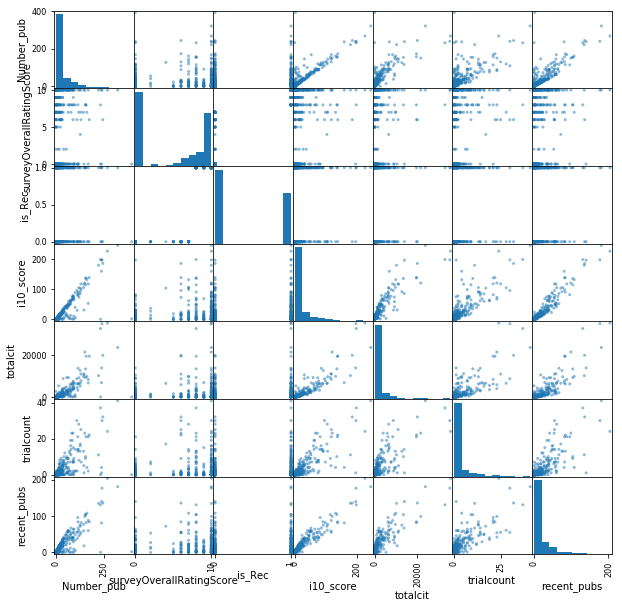

In [139]:
ind_cols=['Number_pub','surveyOverallRatingScore','is_Rec','i10_score','totalcit','trialcount','recent_pubs']

a = pd.plotting.scatter_matrix(df_doc[ind_cols],alpha=0.5,figsize=(10,10), diagonal='hist')

In [140]:
#eliminate columns definitely not useful in fit
column_list = []
for col in df_doc: column_list.append(col)
column_list

['aboutMe',
 'address.line1',
 'address.line2',
 'affiliatedHospitalIDs',
 'age',
 'gender',
 'isRecommendedProvider',
 'payorCount',
 'premiumDisplayOasLabel',
 'providerSponsorships',
 'specialistDesc',
 'surveyOverallRatingPercent',
 'surveyOverallRatingScore',
 'surveyStarRatingScore',
 'surveyUserCount',
 'yearsSinceGraduation',
 'isbest',
 'Number_pub',
 'HGST7FF97B36330214',
 'HGST750A7B36330101',
 'HGSTF40A7B36330154',
 'HGST3A0A7B36330012',
 'HGSTE10A7B36330204',
 'HGST760A7B36330119',
 'HGSTB00A7B36330236',
 'HGST410A7B36330194',
 'HGSTDAF97B36330315',
 'HGSTE20A7B36330169',
 'HGST9B346F56140281',
 'HGSTC80A7B36330046',
 'HGSTCA0A7B36330024',
 'HGST58380596310051',
 'HGSTEEC52386220035',
 'HGSTE0D52386220071',
 'HGST720A7B36330162',
 'HGST6CF97B36330270',
 'HGST800A7B36330233',
 'HGSTA24BC8B6450801',
 'HGSTDFF97B36330221',
 'HGST36380596310016',
 'HGST590A7B36330056',
 'HGCH42E52386223301',
 'HGCH52E52386223302',
 'HGST23D52386220110',
 'HGST75380596310003',
 'HGSTAAF97B36330

In [142]:
droplist = column_list[:12]
droplist+=column_list[13:16]
droplist

['aboutMe',
 'address.line1',
 'address.line2',
 'affiliatedHospitalIDs',
 'age',
 'gender',
 'isRecommendedProvider',
 'payorCount',
 'premiumDisplayOasLabel',
 'providerSponsorships',
 'specialistDesc',
 'surveyOverallRatingPercent',
 'surveyStarRatingScore',
 'surveyUserCount',
 'yearsSinceGraduation']

In [143]:
df_doc = df_doc.drop(droplist, axis = 1)

In [144]:
df_doc.head()

,surveyOverallRatingScore,isbest,Number_pub,HGST7FF97B36330214,HGST750A7B36330101,HGSTF40A7B36330154,HGST3A0A7B36330012,HGSTE10A7B36330204,HGST760A7B36330119,HGSTB00A7B36330236,...,HGST460B7B36030103,HGSTA5380596310008,HGSTC6380596310025,HGST600A7B36330231,HGST11346F56140088,i10_score,totalcit,is_Rec,recent_pubs,trialcount
fullname,,,,,,,,,,,,,,,,,,,,,
Sylvia Adams,10.0,False,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30,2195.0,1.0,26,5
Morton Coleman,10.0,False,90.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,77,4674.0,1.0,41,8
Karen Haglof,9.0,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,1,0
Michael Grossbard,7.0,True,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29,1440.0,0.0,17,1
Jeffrey Tepler,10.0,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,144.0,1.0,0,0


In [145]:
#Add articlewords that can be used to find specialties. Article words are all words in abstract and title.
def articlewords(doctorname):
    title_out = ""
    #make a list of Ids in the dataframe
    uid_list = []
    for uid in pub_dict[doctorname]:
        if uid in df_pub.index: uid_list.append(uid)
    for uid in uid_list:
        title_out += df_pub.loc[uid,'ArticleTitle']
        title_out += ' '
        if type(df_pub.loc[uid,'Abstract']) is not float:
        
            title_out += df_pub.loc[uid,'Abstract']
            title_out += ' '
    return title_out

In [146]:
df_doc['ArticleWords'] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: articlewords(x))

In [147]:
#save as a .pkl file
df_doc.to_pickle('NYdatafinal.pkl')